In [1]:
#DATASET : Category: Gaming
#To predict the global sales of video games in different countries

#DATA COLLECTION

import pandas as pd

In [5]:
data=pd.read_csv('vgsales.csv.zip')

In [6]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
# DATA ANALYSIS

#Using pair plot to sea feature-feature relations

import seaborn as sb

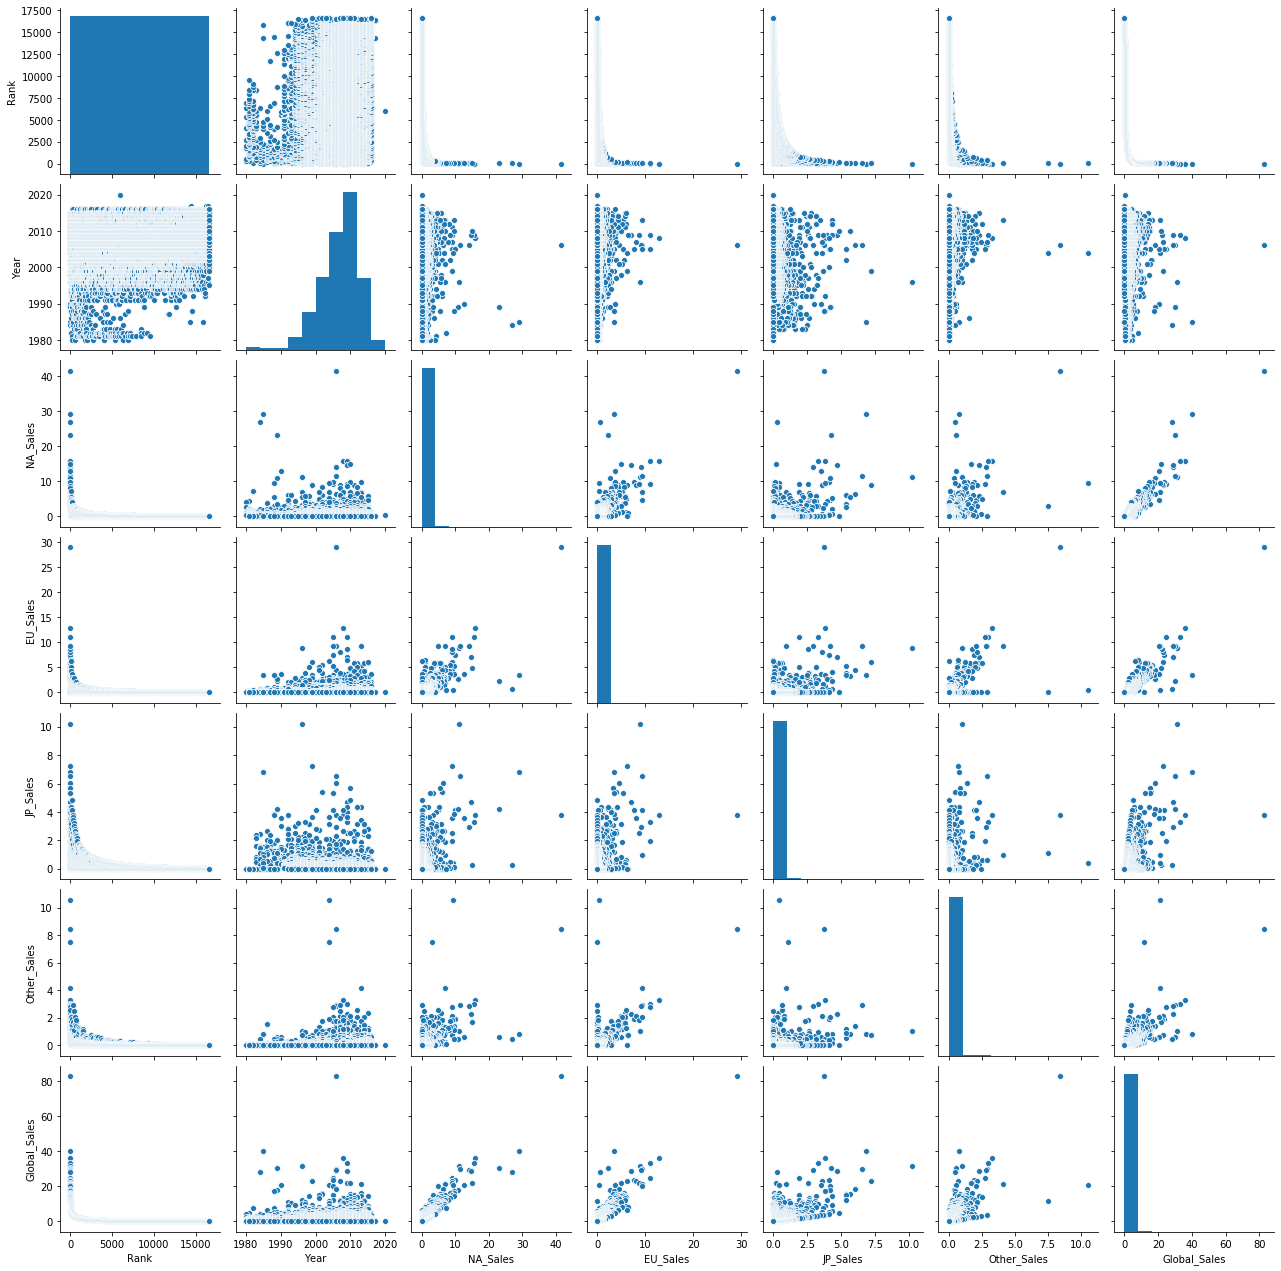

In [11]:
sb.pairplot(data)

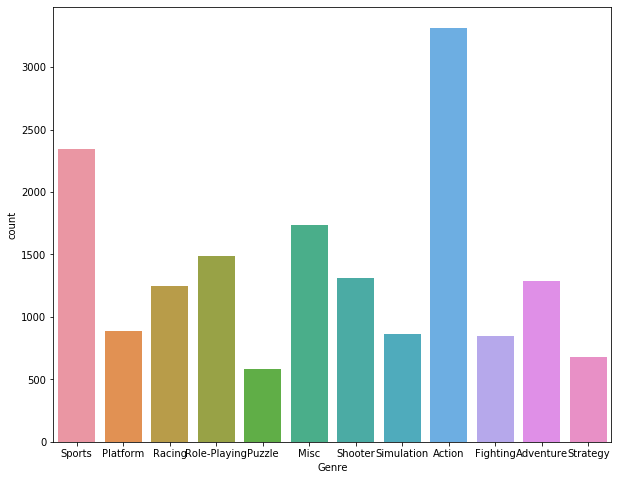

In [19]:
#Using count plot

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sb.countplot(data['Genre'])
plt.show()

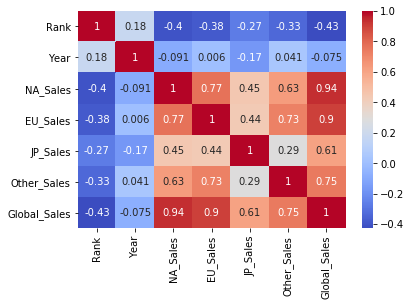

In [20]:
sb.heatmap(data.corr(),annot=True,cmap="coolwarm")

In [21]:
X= data.drop(['Name', 'Platform' ,'Year', 'Genre','Publisher'],axis='columns')

In [23]:
# Defining the features and dependent variable

x = X.iloc[:,:-1].values
y = X.iloc[:,-1].values

In [24]:
x

array([[1.0000e+00, 4.1490e+01, 2.9020e+01, 3.7700e+00, 8.4600e+00],
       [2.0000e+00, 2.9080e+01, 3.5800e+00, 6.8100e+00, 7.7000e-01],
       [3.0000e+00, 1.5850e+01, 1.2880e+01, 3.7900e+00, 3.3100e+00],
       ...,
       [1.6598e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.6599e+04, 0.0000e+00, 1.0000e-02, 0.0000e+00, 0.0000e+00],
       [1.6600e+04, 1.0000e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [25]:
# Splitting the dataset into test vs train


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [26]:
#ALGORITHM SELECTION

# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
linreg = LinearRegression() 

linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
linregacc= linreg.score(x_test,y_test)

In [28]:
linregacc

0.9999901919551856

In [29]:
linregpred= linreg.predict(x_test)

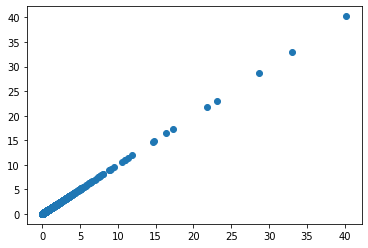

In [30]:
# Scatter plot to see prediction vs actual value

plt.scatter(y_test,linregpred)